## Exploratory Data Analysis on Mega Cap Healthcare Stocks

An EDA was performed on a dataset of selected mega cap healthcare stocks (> $ 200 billion by market capitalisation) obtained using [FinViz stock screener](https://finviz.com/screener.ashx).

**Disclaimer:**

This code is for *educational purposes only*. Don't use it in its current form to buy & sell stocks in the financial markets using your own hard-earned cash (or, worse, someone else's cash). However, this can be a starting point to develop further investment strategies. Please do your own due diligence & trade at your own discretion.

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

### Section 1 - Data Cleaning
The data have been retrieved using [FinViz stock screener](https://finviz.com/screener.ashx) on 24 April 2023 from FinViz's 'Overview', 'Valuation' and 'Financial' tabs. The only parameters selected was:
- Market Cap. = Mega ($200bln and more).
- Sector = Healthcare

The data were then copied and pasted manually into Excel (since I haven't quite gotten the hang of using the various FinViz APIs. The xlsx file is included in this repo). Like on FinViz website, the data are organised into three tabs (overview, valuation & financial). So, initially, we need to merge data from the different tabs into one dataframe.

In [2]:
# Load the overview tab data
overview = pd.read_excel('FinViz_MegaCap_Healthcare_April2023.xlsx', sheet_name='overview')
overview.head()

,No.,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,1,ABBV,AbbVie Inc.,Healthcare,Drug Manufacturers - General,USA,288.27B,24.75,164.08,0.0103,4146265
1,2,AZN,AstraZeneca PLC,Healthcare,Drug Manufacturers - General,United Kingdom,232.16B,71.93,75.81,0.0028,3095821
2,3,JNJ,Johnson & Johnson,Healthcare,Drug Manufacturers - General,USA,427.63B,34.24,163.68,0.0061,5272110
3,4,LLY,Eli Lilly and Company,Healthcare,Drug Manufacturers - General,USA,355.20B,55.48,383.35,-0.0049,2059489
4,5,MRK,"Merck & Co., Inc.",Healthcare,Drug Manufacturers - General,USA,291.16B,20.29,115.94,0.0049,4283327


In [3]:
# Load the valuation tab data
valuation = pd.read_excel('FinViz_MegaCap_Healthcare_April2023.xlsx', sheet_name='valuation')
valuation.head()

,No.,Ticker,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,P/C,P/FCF,EPS this Y,EPS next Y,EPS past 5Y,EPS next 5Y,Sales past 5Y,Price,Change,Volume
0,1,ABBV,288.27B,24.75,14.78,-,4.97,16.85,31.23,20.29,0.027,0.0082,0.133,-0.0437,0.155,164.08,0.0103,4146265
1,2,AZN,232.16B,71.93,14.44,5.53,5.23,6.34,36.25,53.33,0.384,0.1390,0.023,0.1300,0.146,75.81,0.0028,3095821
2,3,JNJ,427.63B,34.24,14.90,7.89,4.44,5.57,18.18,68.75,-0.137,0.0325,0.053,0.0434,0.044,163.68,0.0061,5272110
3,4,LLY,355.20B,55.48,32.66,2.46,12.44,32.46,160.59,209.64,0.128,0.3886,0.101,0.2257,0.074,383.35,-0.0049,2059489
4,5,MRK,291.16B,20.29,13.77,1.94,4.91,6.39,22.07,37.84,0.174,0.2194,0.256,0.1047,0.081,115.94,0.0049,4283327


In [4]:
# Load the financial tab data
financial = pd.read_excel('FinViz_MegaCap_Healthcare_April2023.xlsx', sheet_name='financial')
financial.head()

,No.,Ticker,Market Cap,Dividend,ROA,ROE,ROI,Curr R,Quick R,LTDebt/Eq,Debt/Eq,Gross M,Oper M,Profit M,Earnings,Price,Change,Volume
0,1,ABBV,288.27B,0.0361,0.083,0.734,0.205,1,0.8,3.43,3.67,0.715,0.312,0.203,Apr 27/b,164.08,0.0103,4146265
1,2,AZN,232.16B,0.0321,0.034,0.091,0.069,0.9,0.7,0.64,0.79,0.803,0.085,0.074,Apr 27/b,75.81,0.0028,3095821
2,3,JNJ,427.63B,0.0291,0.107,0.253,0.154,1,0.8,0.35,0.52,0.67,0.232,0.199,Apr 18/b,163.68,0.0061,5272110
3,4,LLY,355.20B,0.0118,0.131,0.647,0.244,1.1,0.8,1.38,1.52,0.768,0.250,0.219,Apr 27/b,383.35,-0.0049,2059489
4,5,MRK,291.16B,0.0252,0.135,0.333,0.209,1.5,1.2,0.63,0.67,0.71,0.303,0.245,Apr 27/b,115.94,0.0049,4283327


In [5]:
# drop some columns from the dataframes (since they are not needed or replicated in the other dataframes)
# we're just looking at the fundamentals for now (not share Price, its Change, or Volume at this point)

overview.drop(['No.','Sector','Market Cap','P/E','Price','Change','Volume'], axis=1, inplace=True)
valuation.drop(['No.','Price','Change','Volume'], axis=1, inplace=True)
financial.drop(['No.','Market Cap','Earnings','Price','Change','Volume'], axis=1, inplace=True)

The overview and valuation dataframes are first merged into df1. Next, df1 is merged with the financial dataframe into df2 dataframe.

In [6]:
df1 = pd.merge(overview, valuation, on='Ticker', how='outer')
df2 = pd.merge(df1, financial, on='Ticker', how='outer')
df2.reset_index(inplace=True) # reset the dataframe index
df2.drop('index', axis=1, inplace=True) # drop the original 'index' column
df2

,Ticker,Company,Industry,Country,Market Cap,P/E,Fwd P/E,PEG,P/S,P/B,...,ROA,ROE,ROI,Curr R,Quick R,LTDebt/Eq,Debt/Eq,Gross M,Oper M,Profit M
0,ABBV,AbbVie Inc.,Drug Manufacturers - General,USA,288.27B,24.75,14.78,-,4.97,16.85,...,0.083,0.734,0.205,1,0.8,3.43,3.67,0.715,0.312,0.203
1,AZN,AstraZeneca PLC,Drug Manufacturers - General,United Kingdom,232.16B,71.93,14.44,5.53,5.23,6.34,...,0.034,0.091,0.069,0.9,0.7,0.64,0.79,0.803,0.085,0.074
2,JNJ,Johnson & Johnson,Drug Manufacturers - General,USA,427.63B,34.24,14.90,7.89,4.44,5.57,...,0.107,0.253,0.154,1,0.8,0.35,0.52,0.67,0.232,0.199
3,LLY,Eli Lilly and Company,Drug Manufacturers - General,USA,355.20B,55.48,32.66,2.46,12.44,32.46,...,0.131,0.647,0.244,1.1,0.8,1.38,1.52,0.768,0.250,0.219
4,MRK,"Merck & Co., Inc.",Drug Manufacturers - General,USA,291.16B,20.29,13.77,1.94,4.91,6.39,...,0.135,0.333,0.209,1.5,1.2,0.63,0.67,0.71,0.303,0.245
5,NVO,Novo Nordisk A/S,Biotechnology,Denmark,282.94B,47.61,30.72,17,10.86,31.57,...,0.247,0.737,0.561,0.9,0.7,0.29,0.31,0.839,0.423,0.314
6,NVS,Novartis AG,Drug Manufacturers - General,Switzerland,224.36B,31.83,14.15,4.22,4.34,3.62,...,0.057,0.114,0.089,1.3,1,0.37,0.47,0.71,0.178,0.134
7,PFE,Pfizer Inc.,Drug Manufacturers - General,USA,223.25B,7.29,10.75,-,2.23,2.34,...,0.163,0.351,0.253,1.2,1,0.34,0.37,0.655,0.364,0.313
8,TMO,Thermo Fisher Scientific Inc.,Diagnostics & Research,USA,219.28B,32.56,21.51,3.33,4.88,5.12,...,0.075,0.163,0.098,1.5,1.2,0.66,0.78,0.422,0.186,0.155
9,UNH,UnitedHealth Group Incorporated,Healthcare Plans,USA,459.54B,22.36,17.39,1.71,1.37,5.87,...,0.083,0.261,0.168,-,-,0.70,0.74,-,0.081,0.058


It is interesting to note that 8 out of the 10 stocks are drug manufacturers. For the two that are not, United Health (UNH) provides diversified healthcare plans, and Thermo Fisher Scientific (TMO) is a diagnostics & research company.

In [7]:
# removing the last 'B' from 'Market Cap' entries & converting all values into float
df2['Market Cap'] = df2['Market Cap'].str.replace('B', '').astype(float)

In [8]:
# replacing '-' with np.nan in columns where '-' is found
df2['PEG'].replace('-', np.nan, inplace=True)
df2['Curr R'].replace('-', np.nan, inplace=True)
df2['Quick R'].replace('-', np.nan, inplace=True)
df2['Gross M'].replace('-', np.nan, inplace=True)

### Section 2 - Financial Ratios

For this EDA, we're only going to analyse the following financial ratios:
- Price Ratios: 'P/E', 'Fwd P/E', 'PEG', 'P/B', 'P/FCF', 'EPS past 5Y', EPS next 5Y'
- Profitability Ratios: 'ROA', 'ROE', 'ROI', 'Curr R', 'Quick R', 'Profit M'
- Debt Ratios: 'LTDebt/Eq', 'Debt/Eq'

In [9]:
# create a copy of df2, selecting the relevant columns only
stocks = df2.copy()
stocks = stocks[['Ticker', 'Market Cap', 'P/E', 'Fwd P/E', 'PEG', 'P/B', 'P/FCF', 'EPS past 5Y', 'EPS next 5Y',
                  'ROA', 'ROE', 'ROI', 'Curr R', 'Quick R', 'Profit M', 'LTDebt/Eq', 'Debt/Eq']]
stocks.set_index('Ticker', inplace=True)
stocks

,Market Cap,P/E,Fwd P/E,PEG,P/B,P/FCF,EPS past 5Y,EPS next 5Y,ROA,ROE,ROI,Curr R,Quick R,Profit M,LTDebt/Eq,Debt/Eq
Ticker,,,,,,,,,,,,,,,,
ABBV,288.27,24.75,14.78,NaN,16.85,20.29,0.133,-0.0437,0.083,0.734,0.205,1.0,0.8,0.203,3.43,3.67
AZN,232.16,71.93,14.44,5.53,6.34,53.33,0.023,0.1300,0.034,0.091,0.069,0.9,0.7,0.074,0.64,0.79
JNJ,427.63,34.24,14.90,7.89,5.57,68.75,0.053,0.0434,0.107,0.253,0.154,1.0,0.8,0.199,0.35,0.52
LLY,355.20,55.48,32.66,2.46,32.46,209.64,0.101,0.2257,0.131,0.647,0.244,1.1,0.8,0.219,1.38,1.52
MRK,291.16,20.29,13.77,1.94,6.39,37.84,0.256,0.1047,0.135,0.333,0.209,1.5,1.2,0.245,0.63,0.67
NVO,282.94,47.61,30.72,17.00,31.57,46.38,0.097,0.0280,0.247,0.737,0.561,0.9,0.7,0.314,0.29,0.31
NVS,224.36,31.83,14.15,4.22,3.62,40.56,0.000,0.0755,0.057,0.114,0.089,1.3,1.0,0.134,0.37,0.47
PFE,223.25,7.29,10.75,NaN,2.34,13.10,0.227,-0.1358,0.163,0.351,0.253,1.2,1.0,0.313,0.34,0.37
TMO,219.28,32.56,21.51,3.33,5.12,33.97,0.236,0.0977,0.075,0.163,0.098,1.5,1.2,0.155,0.66,0.78


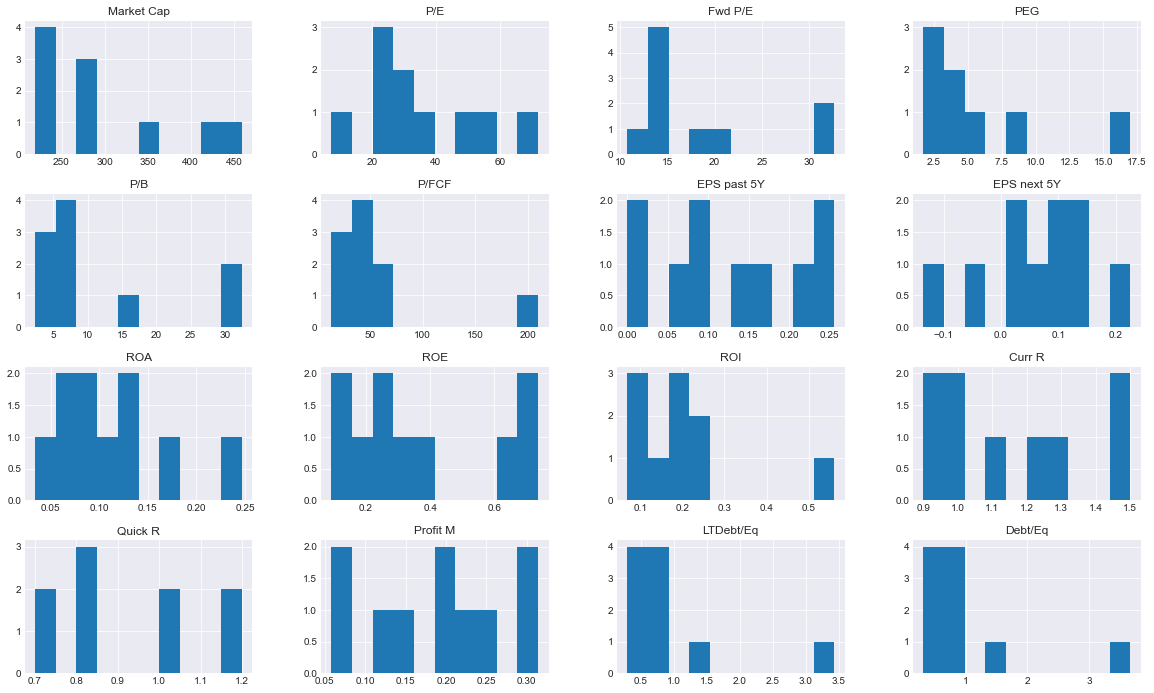

In [10]:
# examine the data distribution
stocks.hist(figsize=(20,12))
plt.tight_layout
plt.show()

- Most of the companies on this list are worth below USD 300 billion. Only two companies are above  USD 400 billion.
- PEG seems to be on the lower end for most of the companies, suggesting that analysts anticipate measurable overall growth for these companies in the near future relative to the share prices.
- Similarly, the distributions for P/E, P/B, P/FCF, ROA and ROI are skewed to the left. In contrast, those for ROE, Curr R and Quick R are bimodal.
- The overall distributions for EPS past 5Y and EPS next 5Y are noticably different. This suggests that major changes in earnings for at least some of these companies are anticipated in the next 5 years.
-  The majority of the companies display overall Debt / Equity ratios < 2 with only one company having ratios of > 3. The distribution for Long-Term Debt / Equity (LTDebt/Eq) is similar to that of Debt/Eq, indicating that these companies do not have significant long-term debt.

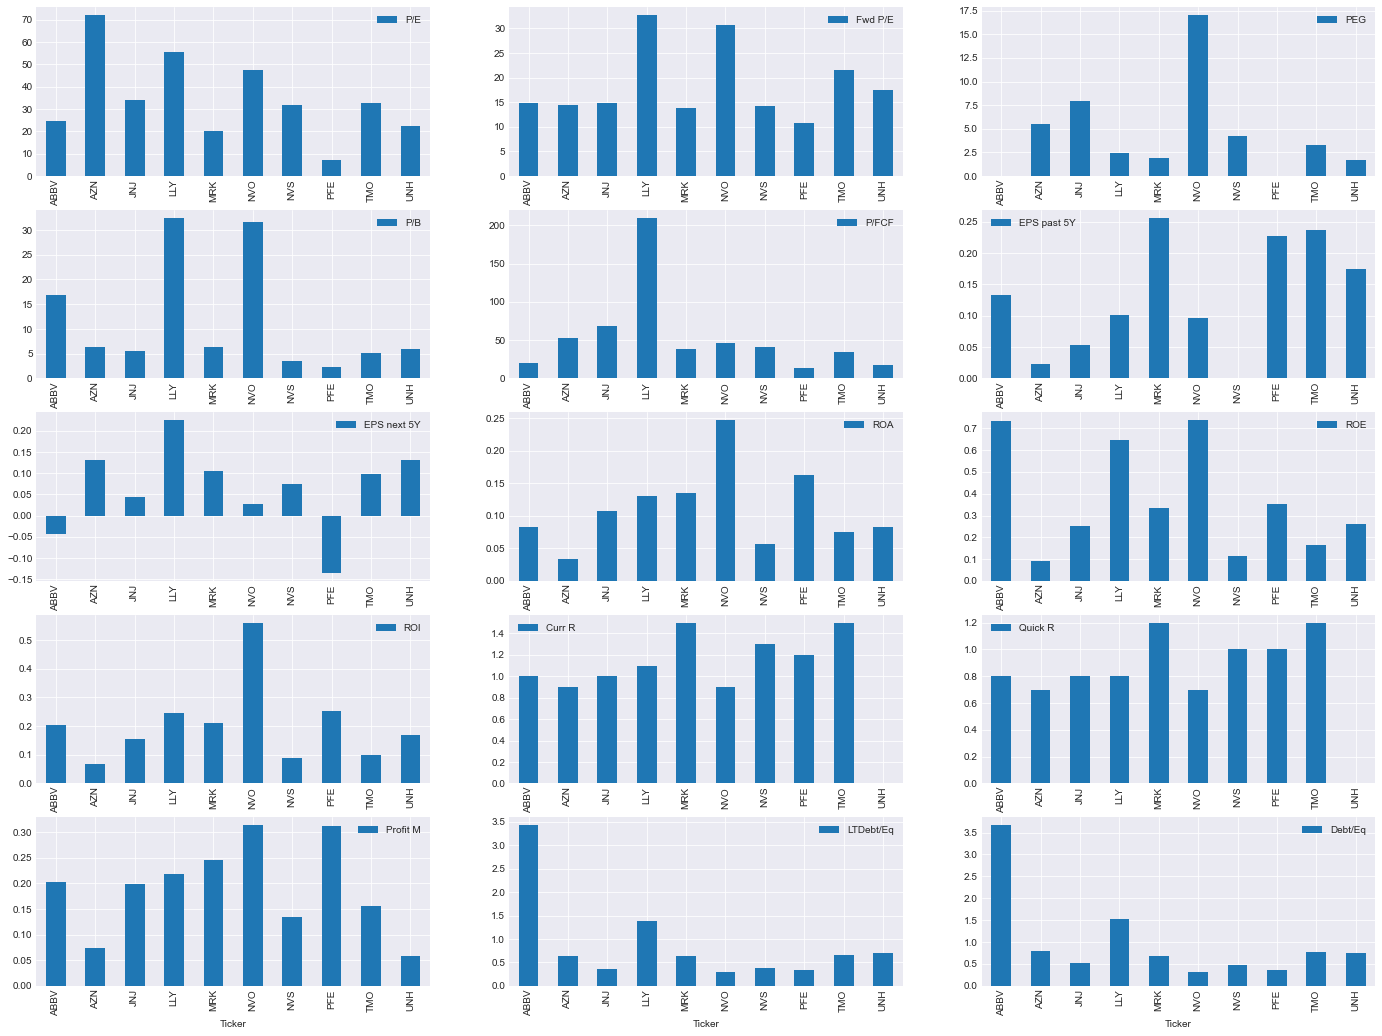

In [11]:
# quick visualisation of the various ratios as bar charts
nrow = 5
ncol = 3

fig, axes = plt.subplots(nrow, ncol, figsize=(24,18))
count=1
for r in range(nrow):
    for c in range(ncol):
        stocks.iloc[:,count].plot(kind='bar', ax=axes[r,c])
        axes[r][c].legend()
        count+=1
plt.tight_layout
plt.show()

- Only NVO displays a high PEG of value of 17.00, while the values for the other stocks were are < 10.
- AZN has the highest P/E followed by LLY and NVS. LLY and NVS also have the highest P/B (Only LLY displays a P/FCF of value of over 200). These metrics suggest that AZN, LLY or NVS may be overpriced.
- Looking at EPS over the last 5 years, ABBV an PFE have been relatively high. However, EPS for the next 5 years are expected to be negative for the two stocks. EPS estimates for the next 5 years have also been downsized for the other stocks, with the exception of NVS and LLY.
- The majority of the companies display Debt / Equity ratio < 1, but ABBV have high LTDebt/Eq and Debt/Eq ratios > 3.
- ROA seems to mirror ROI, but ROE is high for ABBV. This is expected since equity is asset minus liabilities (ABBV has a relatively higher Debt/Eg ratio compared to the others).
- Current and Quick Ratios display a similar pattern with MRK and TMO showing the highest ratios among others.

### Section 3 - Price Trends & Correlations

In [12]:
# get the close prices for the selected stocks
start_date = dt.datetime(2018,1,1)
end_date = dt.datetime(2023,4,30)

yfin.pdr_override()

tickers = list(stocks.index)
stocks_close = pd.DataFrame()

for j in tickers:
    stocks_close[j] = pdr.get_data_yahoo(j, start=start_date, end=end_date)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
# quick check of the dataframe
stocks_close.head()

,ABBV,AZN,JNJ,LLY,MRK,NVO,NVS,PFE,TMO,UNH
Date,,,,,,,,,,
2018-01-02 00:00:00-05:00,98.410004,35.380001,139.229996,84.680000,53.645039,54.160000,75.878136,34.573055,192.979996,221.160004
2018-01-03 00:00:00-05:00,99.949997,35.450001,140.559998,85.139999,53.568703,54.680000,76.469536,34.829224,196.520004,223.479996
2018-01-04 00:00:00-05:00,99.379997,35.500000,140.550003,85.519997,54.437023,54.490002,76.541222,34.905125,198.979996,224.449997
2018-01-05 00:00:00-05:00,101.110001,35.869999,141.710007,86.570000,54.379772,54.740002,77.302864,34.971539,202.389999,228.729996
2018-01-08 00:00:00-05:00,99.489998,35.619999,141.889999,86.129997,54.064884,54.689999,77.258064,34.582542,202.720001,224.759995


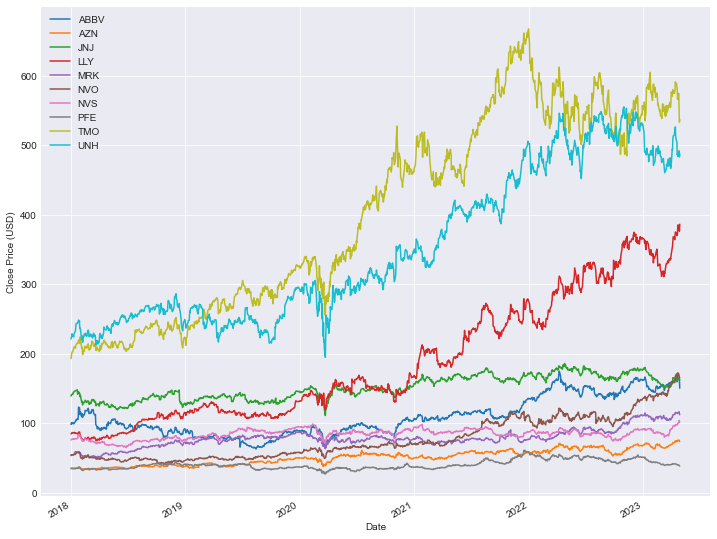

In [14]:
# plot the close price for the 10 stocks
stocks_close.plot(figsize = (12, 10))
plt.ylabel('Close Price (USD)')
plt.show()

Overall, the prices for the top 10 mega cap healthcare stocks have somewhat increased since the beginning of 2018. For a better comparison between the stocks, the prices were normalised to 1 at the beginning of the period and plotted again (see below).

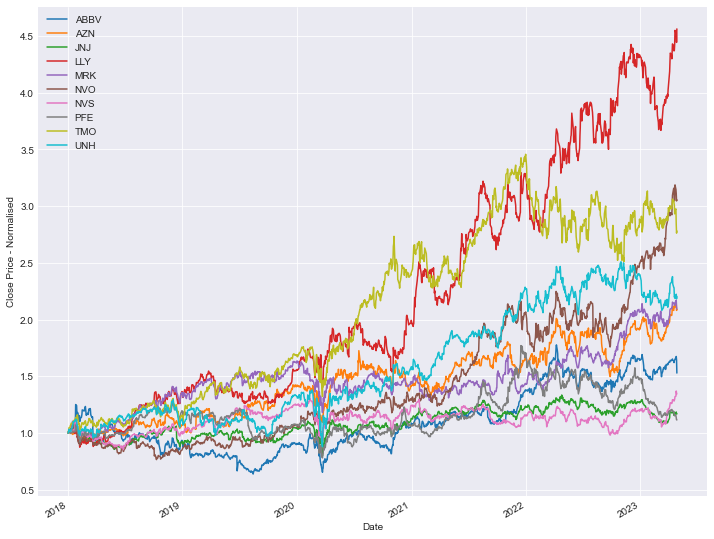

In [15]:
# plot the normalised share prices
(stocks_close/stocks_close.iloc[0]).plot(figsize = (12, 10))
plt.ylabel('Close Price - Normalised')
plt.show()

The share prices for LLY, NVO and TMO have grown more than 2.5 x since the beginning of the period, with LLY showing the strongest growth of > 4.5 x. Especially after COVID-19, the other stocks have also grown noticeably: UNH, MRK, AZN, ABBV (between 1.5 - 2.5 x), or slightly: NVS, PFE, JNJ (below 1.5 x). Next, the correlations between the stocks are calculated (below).

In [16]:
# calculate the correlations between the stocks
stocks_corr = stocks_close.corr(method='pearson')
# reset symbol as index
stocks_corr.head().reset_index()
stocks_corr

,ABBV,AZN,JNJ,LLY,MRK,NVO,NVS,PFE,TMO,UNH
ABBV,1.000000,0.775809,0.791487,0.884864,0.582093,0.886591,0.167849,0.711083,0.754643,0.906218
AZN,0.775809,1.000000,0.856777,0.910619,0.798934,0.908850,0.576139,0.602494,0.913235,0.897376
JNJ,0.791487,0.856777,1.000000,0.873432,0.597475,0.805790,0.509101,0.736971,0.893110,0.904319
LLY,0.884864,0.910619,0.873432,1.000000,0.799767,0.956848,0.385411,0.723145,0.885615,0.963351
MRK,0.582093,0.798934,0.597475,0.799767,1.000000,0.777511,0.583556,0.483702,0.642095,0.696233
NVO,0.886591,0.908850,0.805790,0.956848,0.777511,1.000000,0.382980,0.668238,0.880184,0.921571
NVS,0.167849,0.576139,0.509101,0.385411,0.583556,0.382980,1.000000,0.184827,0.489392,0.336384
PFE,0.711083,0.602494,0.736971,0.723145,0.483702,0.668238,0.184827,1.000000,0.682758,0.786294
TMO,0.754643,0.913235,0.893110,0.885615,0.642095,0.880184,0.489392,0.682758,1.000000,0.916480
UNH,0.906218,0.897376,0.904319,0.963351,0.696233,0.921571,0.336384,0.786294,0.916480,1.000000


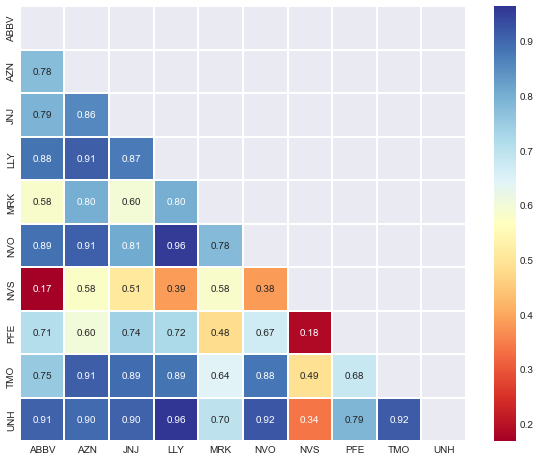

In [17]:
# Plot the correlations as a heatmap
fig, ax = plt.subplots(figsize=(10,8))

# to mask mirrored side of heatmap
dropSelf = np.zeros_like(stocks_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Generate heatmap, with annotations of the correlation strength and 2-decimal floats
ax = sns.heatmap(stocks_corr, cmap='RdYlBu', annot=True, fmt=".2f", mask=dropSelf, linewidth=2)
plt.show()

Although the degree of correlations vary, it is interesting to note that the correlations are all positive. Strong correlations are observed, for example, between NVO and AZN or LLY. The weakest correlations are seen between NVS and ABBV or PFE. The two stocks that are not drug manufacturers (TMO and UNH) are strongly correlated to the other stocks, except NVS.